# **Humana Competition**

# Dataset and Packages Importing 

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
# Other packages we might need
## import scipy.sparse as spr
## from scipy.stats import ortho_group

## from scipy import optimize
## from math import sqrt

In [3]:
# Load the training and holdout datasets
training = pd.read_csv("2022_Competition_Training.csv")
holdout = pd.read_csv("2022_Competition_Holdout.csv")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (760) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
training.info() # 48300 pieces of data, 881 variables (880 feature + 1 hi_flag)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Columns: 881 entries, id to hi_flag
dtypes: float64(817), int64(57), object(7)
memory usage: 324.6+ MB


In [5]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Columns: 880 entries, id to atlas_snapspth16
dtypes: float64(815), int64(58), object(7)
memory usage: 82.0+ MB


In [6]:
training.head() # see if training is correctly loaded

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,hi_flag
0,100039218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.08,33511.0,0.0,0.0,0.00,0.0,9.1,NaN,0
1,100042427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,176797.0,0.0,0.0,0.00,0.0,6.8,0.670459,0
2,100055103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,380673.0,0.0,0.0,0.00,0.0,8.3,0.879186,0
3,100074556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,267696.0,0.0,0.0,0.00,0.0,7.3,0.746201,0
4,100079932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,19095.0,0.0,0.0,0.25,0.0,6.9,NaN,0


In [7]:
holdout.head() # see if holdout is correctly loaded

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cci_ren_m_pmpm_ct,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16
0,100093066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.08,56707.0,0.0,0.0,0.16,0.0,5.7,1.072233
1,100313000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,83699.0,0.0,0.0,0.00,0.0,6.4,1.401754
2,100330875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,702890.0,0.0,0.0,0.00,0.0,8.9,0.489536
3,100346385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.0,0.00,1323059.0,0.0,0.0,0.25,0.0,7.7,0.780388
4,100443164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.00,285449.0,0.0,0.0,0.00,0.0,7.5,0.745321


In [8]:
training.dtypes.value_counts()

float64    817
int64       57
object       7
dtype: int64

# Data Understanding
General Analysis of Columns' Meaning



In [ ]:
colname = list(training.columns) # a list of column names

In [ ]:
# What are the prefixes? How many variables contained in each "prefix" and what are they?
## create a list of keys to be included in the dict
col_key = ["other"] 
## create a loop that includes all the keys
for i in range(len(colname)):
  index = colname[i].find("_")
  if index != -1 and colname[i][:index] not in col_key:
    col_key += [colname[i][:index]]
## create a loop that includes all the variables that belongs to each key
col_dict = {}
for i in range(len(col_key)):
  col_dict[col_key[i]] = []
col_dict["other"] = ["id"]
for i in range(len(colname)):
  index = colname[i].find("_")
  if index != -1:
    col_dict[colname[i][:index]].insert(-1,colname[i])
## put all the variable that has no similar prefix to "other"
for keyword in col_dict.keys() - "other":
  if len(col_dict[keyword]) == 1:
    col_dict["other"].append(col_dict[keyword][0])
    col_dict.pop(keyword)
## check what the dictionary looks like
# col_dict # 可以看到整个dictionary
# col_dict.keys() # 可以看到整个dictionary里的key都是什么，i.e.有哪些前缀

\begin{array}{cccc}
\text{feature}&\text{number}&\text{meaning} & \text{according to others}\\
\text{other}&7+1&\text{id, geographic, sex...} & \text{} \\
\text{rx}&234&\text{prescription} & \text{}\\
\text{cmsd2}&283&\text{claims} & \text{}\\
\text{rev}&74&\text{claim lines for a revenue code} & \text{descriptions and dollar amounts charged for hospital services}\\
\text{cci}&20&\text{count of claims} & \text{}\\
\text{rwjf}&21&\text{health outcomes} & \text{Regional
healthcare and economic factors}\\
\text{bh}&54&\text{behavioral health claims} & \text{}\\
\text{cnt}&65&\text{count of member interaction} & \text{}\\
\text{total}&44&\text{allowed cost?} & \text{Overall claims/cost}\\
\text{cmsd1}&22&\text{claim per month} & \text{}\\
\text{credit}&10&\text{bank loan, mortgage} & \text{Personal bank account and statement information}\\
\text{cms}&16&\text{risk scores...} & \text{Claims and
Medicare plan payment}\\
\text{cons}&9&\text{loan, managing health...} & \text{Regional census data}\\
\text{med}&12&\text{days since last claim} & \text{Trend of prescription cost for specific diseases}\\
\text{atlas}&9&\text{population size...} & \text{Economic and poverty situation}\\
\end{array}

# Data Cleaning

1.   Non-distinct Values by Column
2.   Null Value Detection by Column
3.   Data Type: binary/categorial/numerical



## Non-distinct Values

### Detecting non-distinct values

In [ ]:
# drop non-distinct values
drop_cols = []

for col in training.columns:
    if training[col].nunique() == 1:
        drop_cols.append(col)
drop_cols = list(set(drop_cols))

len(drop_cols)
# 211 columns have non-distinct values, maybe drop?

211

In [ ]:
# test non-distinctive value in holdout sample
count = 0

for col in drop_cols:
  if holdout[col].nunique() == 1:
    count += 1

count # 211 as well

211

### Droping non-distinctive columns

In [ ]:
# drop non-distinctive columns
training_dist = training.drop(columns=drop_cols)
training_dist.info() # 881 - 211 = 670 variables
holdout_dist = holdout.drop(columns=drop_cols)
holdout_dist.info() # 880 - 211 = 669 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Columns: 670 entries, id to hi_flag
dtypes: float64(625), int64(38), object(7)
memory usage: 246.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Columns: 669 entries, id to atlas_snapspth16
dtypes: float64(623), int64(39), object(7)
memory usage: 62.4+ MB


## Null Value Detection and Analysis

### Detecting null values

In [ ]:
# What is the number of null values in each column?
num_null = training.isnull().sum() # sum of NaN in each column
null_df = pd.DataFrame(columns = ['VariableName', 'TrainingNullCount']) # an empty dataframe
for i in range(len(num_null)):
  if num_null[i] != 0:
    new_row = pd.DataFrame([[colname[i], num_null[i]]], columns = ['VariableName', 'TrainingNullCount'])
    null_df = null_df.append(new_row, ignore_index=True)
# 260 columns have null values and we can work on it
sorted_null_df = null_df.sort_values(by= "TrainingNullCount", ascending = False)
sorted_null_df[:5]

,VariableName,TrainingNullCount
109,cms_risk_adj_payment_rate_b_amt,48276
85,cms_tot_partd_payment_amt,45981
163,credit_hh_agencyfirstmtg_new,45299
188,credit_bal_autobank_new,45243
198,credit_num_autobank_new,45238


In [ ]:
# test null values in the 260 columns above in the holdout sample
num_null_holdout = holdout.isnull().sum().sort_values(ascending = False).to_frame().reset_index()
num_null_holdout = num_null_holdout.rename(columns={"index": "VariableName", 0: "HoldoutNullCount"})
# new dataframe with the null count of all columns in the holdout sample
full_sorted_null_df = sorted_null_df.merge(num_null_holdout, left_on='VariableName', right_on='VariableName')
# these 12 columns to be dropped -- 80%+ NAs in each column
full_sorted_null_df[full_sorted_null_df["TrainingNullCount"] > 0.8 * 48300] == full_sorted_null_df[full_sorted_null_df["HoldoutNullCount"] > 0.8 * 12220]

,VariableName,TrainingNullCount,HoldoutNullCount
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True


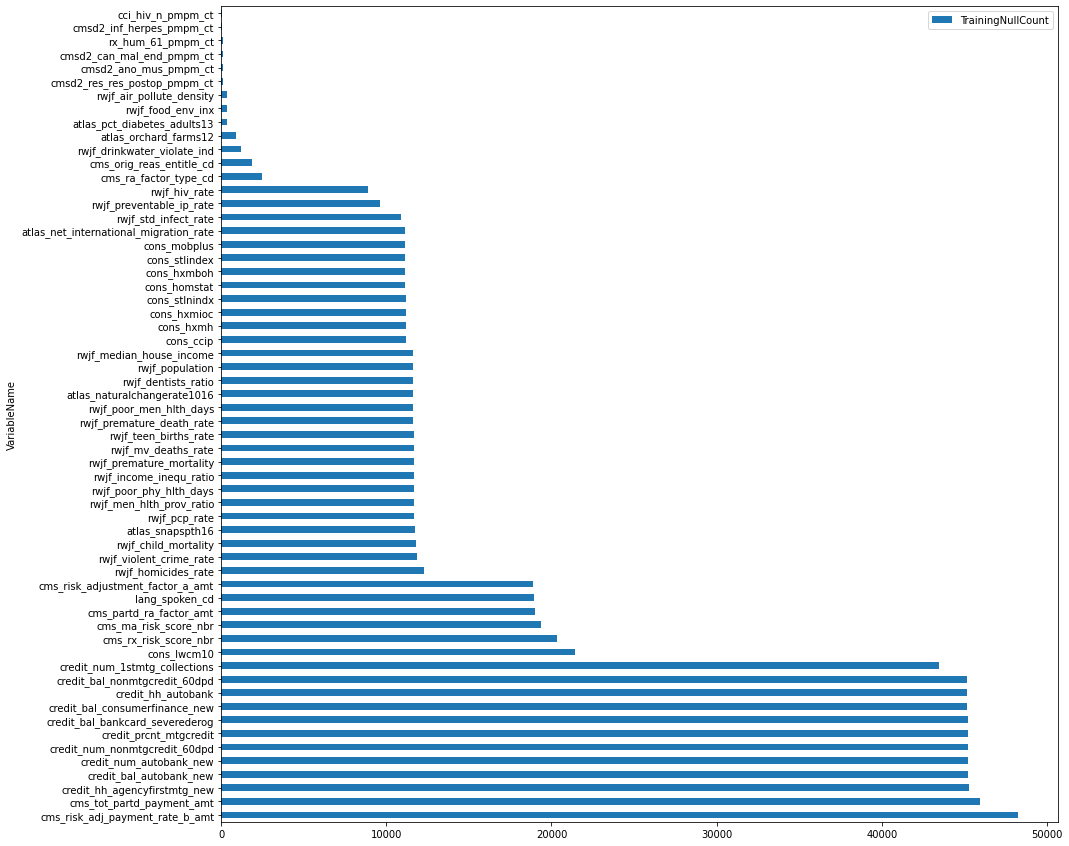

In [ ]:
ax = full_sorted_null_df[:60].plot.barh(x="VariableName", y="TrainingNullCount", figsize=(15, 15))

### Dropping columns with 80%+ null values

In [ ]:
full_sorted_null_df["VariableName"][0:12] #drop 12 columns

0     cms_risk_adj_payment_rate_b_amt
1           cms_tot_partd_payment_amt
2        credit_hh_agencyfirstmtg_new
3             credit_bal_autobank_new
4             credit_num_autobank_new
5       credit_num_nonmtgcredit_60dpd
6              credit_prcnt_mtgcredit
7     credit_bal_bankcard_severederog
8      credit_bal_consumerfinance_new
9                  credit_hh_autobank
10      credit_bal_nonmtgcredit_60dpd
11      credit_num_1stmtg_collections
Name: VariableName, dtype: object

In [ ]:
training_dist2 = training_dist.drop(columns=full_sorted_null_df["VariableName"][0:12])
training_dist2.info() # 881 - 211 - 12 = 670 - 12 = 658 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48300 entries, 0 to 48299
Columns: 658 entries, id to hi_flag
dtypes: float64(613), int64(38), object(7)
memory usage: 242.5+ MB


In [ ]:
holdout_dist2 = holdout_dist.drop(columns=full_sorted_null_df["VariableName"][0:12])
holdout_dist2.info() # 881 - 211 - 12 = 669 - 12 = 657 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Columns: 657 entries, id to atlas_snapspth16
dtypes: float64(611), int64(39), object(7)
memory usage: 61.3+ MB


### Note: Misleading feature type

In [ ]:
# race is a column consisting 1-6, but there are numerical and string values
training_dist2["cms_race_cd"] = training_dist2["cms_race_cd"].astype(str).values
training_dist2["cms_race_cd"].unique()

array(['1', '6', '2', '3', '5', '4', '0', '*'], dtype=object)

### Fill NA values in the other 248 columns

In [ ]:
for col in training_dist2.columns:
  # no binary variables have missing value
  if col in training_dist2.loc[:,(training_dist2.dtypes == "object").values].columns:
    training_dist2[col].fillna(training_dist2[col].mode().iloc[0], inplace = True) # deal with categorical
  else:
    training_dist2[col].fillna(training_dist2[col].median(), inplace = True) # deal with numerical

In [ ]:
training_dist2.loc[:,(training_dist2.dtypes == "object").values].columns # categorical variables

Index(['cons_mobplus', 'cms_ra_factor_type_cd', 'cons_homstat', 'sex_cd',
       'lang_spoken_cd', 'rucc_category', 'cms_race_cd'],
      dtype='object')

In [ ]:
# test if actually fill the missing value
print(training_dist["cons_mobplus"].unique())
print(training_dist2["cons_mobplus"].unique()) # cons_mobplus has 4 values now
print(training_dist["cms_ra_factor_type_cd"].unique())
print(training_dist2["cms_ra_factor_type_cd"].unique()) # cms_ra_factor_type_cd has 8 values
print(training_dist["cons_homstat"].unique()) 
print(training_dist2["cons_homstat"].unique()) # cons_homstat has 5 values
print(training_dist["sex_cd"].unique())
print(training_dist2["sex_cd"].unique()) # sex_cd has 2 values
print(training_dist["lang_spoken_cd"].unique())
print(training_dist2["lang_spoken_cd"].unique()) # lang_spoken_cd has 3 values
print(training_dist["rucc_category"].unique())
print(training_dist2["rucc_category"].unique()) # rucc_category has 9 values
print(training_dist["cms_race_cd"].unique())
print(training_dist2["cms_race_cd"].unique()) # cms_race_cd has 8 values

['M' 'S' nan 'U' 'P']
['M' 'S' 'U' 'P']
['CN' 'CF' 'CP' 'E' nan 'D' '*' 'C2' 'SE']
['CN' 'CF' 'CP' 'E' 'D' '*' 'C2' 'SE']
['R' 'Y' 'U' nan 'P' 'T']
['R' 'Y' 'U' 'P' 'T']
['M' 'F']
['M' 'F']
['ENG' nan 'SPA' '*']
['ENG' 'SPA' '*']
['3-Metro' '1-Metro' '2-Metro' '5-Nonmetro' '4-Nonmetro' '6-Nonmetro'
 '7-Nonmetro' '8-Nonmetro' '9-Nonmetro']
['3-Metro' '1-Metro' '2-Metro' '5-Nonmetro' '4-Nonmetro' '6-Nonmetro'
 '7-Nonmetro' '8-Nonmetro' '9-Nonmetro']
[1 6 2 3 5 4 0 '1' '2' '3' '5' '4' '0' '6' '*']
['1' '6' '2' '3' '5' '4' '0' '*']


## New dummies for categorical values

In [ ]:
# Turn categorical variables to dummy variables                                       
cleaned_training = pd.get_dummies(training_dist2,drop_first = True)

In [ ]:
len(training_dist2.columns)

658

In [ ]:
len(cleaned_training.columns)
# there are 658 variables, and now there are
# 658 + 4 + 8 + 5 + 2 + 3 + 9 + 8 - 7 - 7 = 683 variables
# the first 7: n-1 new dummies for each n-value feature
# the second 7: we delete the original categorical feature

683

In [ ]:
cleaned_training.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,...,rucc_category_7-Nonmetro,rucc_category_8-Nonmetro,rucc_category_9-Nonmetro,cms_race_cd_0,cms_race_cd_1,cms_race_cd_2,cms_race_cd_3,cms_race_cd_4,cms_race_cd_5,cms_race_cd_6
0,100039218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,100042427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,100055103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,100074556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,100079932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


# EDA



## Distribution Analysis

(array([2.800e+01, 3.000e+00, 1.600e+01, 2.000e+01, 3.100e+01, 4.200e+01,
        8.100e+01, 9.400e+01, 1.230e+02, 1.460e+02, 4.140e+02, 3.400e+02,
        7.900e+02, 6.400e+02, 2.443e+03, 1.762e+03, 6.243e+03, 4.287e+03,
        8.147e+03, 4.883e+03, 5.708e+03, 3.026e+03, 3.727e+03, 1.886e+03,
        1.907e+03, 6.490e+02, 4.740e+02, 1.680e+02, 1.870e+02, 3.500e+01]),
 array([ 25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,
         47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,
         70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,
         92.5,  95. ,  97.5, 100. ]),
 <a list of 30 Patch objects>)

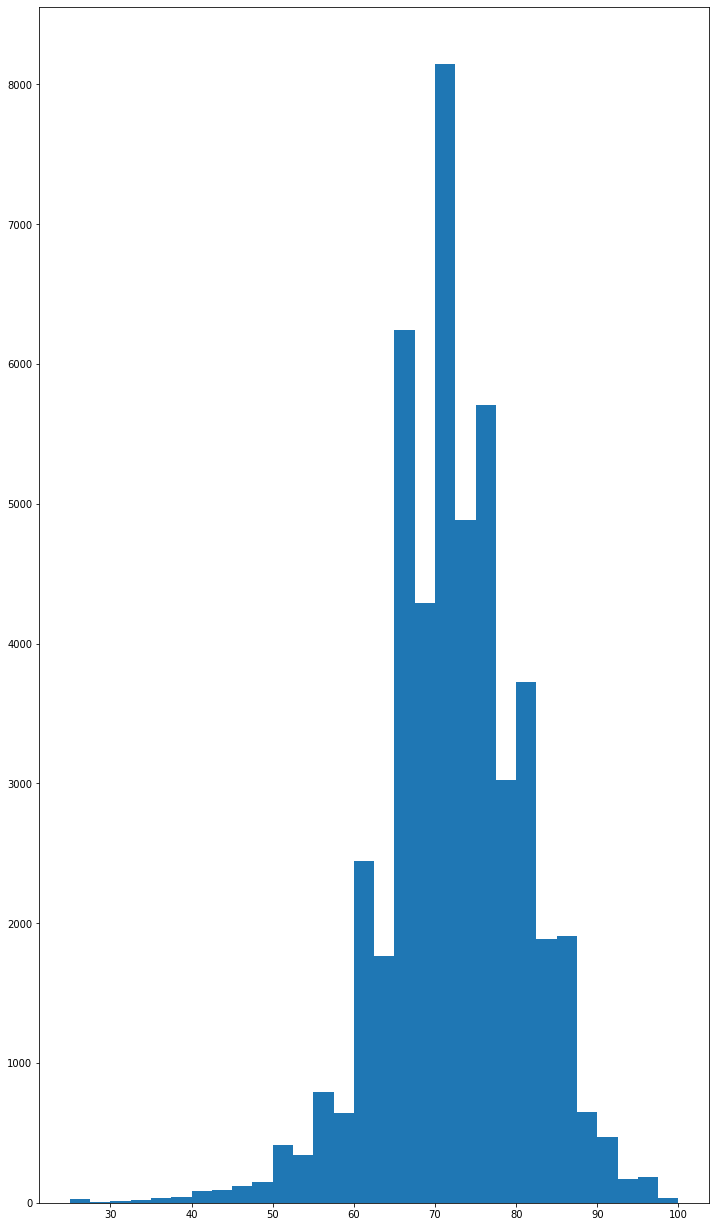

In [ ]:
plt.hist(cleaned_training["est_age"], density=False, bins=30)

In [ ]:
(cleaned_training[cleaned_training["hi_flag"] == 0]["est_age"], cleaned_training[cleaned_training["hi_flag"] == 1]["est_age"])

(0        74
 1        81
 2        75
 3        67
 4        50
          ..
 48295    72
 48296    66
 48297    53
 48298    84
 48299    71
 Name: est_age, Length: 46182, dtype: int64, 15       60
 21       63
 92       67
 103      72
 131      71
          ..
 48184    65
 48185    71
 48260    73
 48281    59
 48290    69
 Name: est_age, Length: 2118, dtype: int64)